# TravelTide


## Overview
This report offers a deep dive into your customers' travel behaviors and preferences. By analyzing your extensive data, we aim to uncover what drives your travelers and how to keep them engaged. Our approach segments customers into distinct groups or "traveler tribes," allowing for the customization of rewards and incentives that feel uniquely tailored to each group. This analysis distills vast data into clear, actionable metrics that shed light on travel patterns, service preferences, and responsiveness to promotions. The ultimate goal is to enhance customer loyalty and drive business success by keeping your travelers engaged with your services.

## Approach and Data Analysis
This section outlines how customer segmentation can be applied within TravelTide to create targeted rewards and incentives. By categorizing customers based on their behaviors and preferences, we can significantly improve customer satisfaction and loyalty.

Our objective is to leverage segmentation to deliver personalized perks that boost loyalty, engagement, and overall satisfaction. We aim to offer at least five specific perks:

## Reward Offerings:

-  Exclusive Discounts
- 1 Night Free Hotel with Flight
- No Cancellation Fees
- Free Hotel Meal
- Free Checked Bag

## Data Processing and Metrics Creation
Starting with a dataset of 50,570 sessions, we distilled the information into 5,998 unique customers, using PostgreSQL to generate key metrics. This process was essential for simplifying the raw data into manageable and insightful variables.

Note: The SQL script file is in SQL folder.

## Key Metrics for Analysis
To determine the most suitable perks for each customer, we focused on the following aggregated metrics:

- Flight/Hotel/Both Preferences
- Age
- Age Group
- Conversion Rate
- Cancellation Rate
- Total Sessions
- Total Trips Booked
- Engagement (Click Efficiency)
- User Activity Level
- Average Checked Bags
- Discount Responsiveness
- Proportions of Discounts (Flights/Hotels/Both)
- Average Offers Received
- Flight Hunter Index
- Hotel Hunter Index

Geo Distance is calculated in SQL.

## Packages need to be installed
- pip install scikit-learn
- pip install ipywidgets
- pip install -U kaleido



In [1]:
import pandas as pd
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
# custom functions 
import Support.db_support as dbs
import Support.cus_support as cus

## Db Connection setup

In [2]:
current_dir = os.getcwd()

In [3]:
dbs.check_tables()

['hotels', 'users', 'flights', 'sessions']

In [4]:
dbs.table_row_count()

hotels: 1918617 records
users: 1020926 records
flights: 1901038 records
sessions: 5408063 records


In [19]:

#All_info_combined.sql
sql_file_path = os.path.join(current_dir, 'SQL', 'All_info_combined.sql')
img_dir_path = '../Images'


In [6]:
CombainedData = dbs.execute_sql_file(sql_file_path)


In [7]:
CombainedData.head()

,user_id,birthdate,gender,married,has_children,home_country,home_city,age,age_group,latest_session,...,both_discount_proportion,discount_responsiveness,total_hotel_usd_spent,total_flight_usd_spent,total_usd_spent,total_nights,scaled_hotel_ads,ads_per_km,scaled_ads_per_km,hotel_hunter_index
0,23557,1958-12-08,F,True,False,usa,new york,65.0,65+,2023-07-14,...,0.0,0.083333,365.75,638.0190,1003.7690,22.0,0.070289,0.000007,0.002772,0.002050
1,94883,1972-03-16,F,True,False,usa,kansas city,52.0,45-54,2023-05-28,...,0.0,0.027778,230.00,5354.8600,5584.8600,1.0,0.066255,0.000002,0.000703,0.000828
2,101486,1972-12-07,F,True,True,usa,tacoma,51.0,45-54,2023-07-18,...,0.0,0.000000,915.00,480.1285,1395.1285,38.0,0.132597,0.000011,0.004808,0.000000
3,101961,1980-09-14,F,True,False,usa,boston,43.0,35-44,2023-06-22,...,0.0,0.011905,1052.00,1884.4970,2936.4970,22.0,0.086834,0.000019,0.007858,0.000724
4,106907,1978-11-17,F,True,True,usa,miami,45.0,45-54,2023-07-27,...,0.0,0.017857,614.80,14067.5700,14682.3700,34.0,0.118706,0.000001,0.000589,0.001696


In [8]:
CombainedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     5998 non-null   int64  
 1   birthdate                   5998 non-null   object 
 2   gender                      5998 non-null   object 
 3   married                     5998 non-null   bool   
 4   has_children                5998 non-null   bool   
 5   home_country                5998 non-null   object 
 6   home_city                   5998 non-null   object 
 7   age                         5998 non-null   float64
 8   age_group                   5998 non-null   object 
 9   latest_session              5998 non-null   object 
 10  total_trips                 5998 non-null   int64  
 11  total_cancellations         5998 non-null   int64  
 12  total_sessions              5998 non-null   int64  
 13  total_cancellation_rate     5998 

In [9]:
CombainedData[['total_trips','total_cancellations','total_cancellation_rate','flight_discount_proportion','hotel_discount_proportion','both_discount_proportion','discount_responsiveness']]

,total_trips,total_cancellations,total_cancellation_rate,flight_discount_proportion,hotel_discount_proportion,both_discount_proportion,discount_responsiveness
0,5,1,0.20,0.083333,0.166667,0.0,0.083333
1,3,0,0.00,0.083333,0.166667,0.0,0.027778
2,5,1,0.20,0.307692,0.000000,0.0,0.000000
3,7,0,0.00,0.250000,0.083333,0.0,0.011905
4,4,1,0.25,0.071429,0.071429,0.0,0.017857
...,...,...,...,...,...,...,...
5993,4,0,0.00,0.125000,0.000000,0.0,0.093750
5994,4,1,0.25,0.125000,0.000000,0.0,0.031250
5995,3,0,0.00,0.375000,0.000000,0.0,0.000000
5996,1,0,0.00,0.250000,0.125000,0.0,0.000000


In [10]:
CombainedData['flight_hunter_index'] = CombainedData['scaled_ads_per_km'] * CombainedData['flight_discount_proportion'] * CombainedData['average_flight_discount']


## User Demographics and Characteristics

### 1. Age Distribution
KPIs:

- Average Age: The mean age of all users.
- Median Age: The middle value when the ages are sorted.
- Age Group Distribution: The percentage of users in different age groups (e.g., 18-25, 26-35, etc.).


In [11]:
# Calculate average and median age
average_age = CombainedData['age'].mean()
median_age = CombainedData['age'].median()

# Calculate age group distribution
age_group_distribution = CombainedData['age_group'].value_counts(normalize=True) * 100

# Display the results
print(f"Average Age: {average_age}")
print(f"Median Age: {median_age}")
print(f"Age Group Distribution:\n{age_group_distribution}")

Average Age: 41.963321107035675
Median Age: 42.0
Age Group Distribution:
age_group
35-44    33.744582
45-54    29.459820
25-34    14.888296
55-64     8.252751
18-24     8.036012
65+       4.318106
<18       1.300433
Name: proportion, dtype: float64


### 2. Gender Distribution
KPIs:

- Gender Ratio: The percentage of male, female, and other gender categories.

In [12]:
# Calculate gender distribution
gender_distribution = CombainedData['gender'].value_counts(normalize=True) * 100

# Display the results
print(f"Gender Distribution:\n{gender_distribution}")


Gender Distribution:
gender
F    88.229410
M    11.587196
O     0.183394
Name: proportion, dtype: float64


### 3. Marital Status
KPIs:

- Percentage Married: The percentage of users who are married.


In [13]:
# Calculate marital status distribution
marital_status_distribution = CombainedData['married'].value_counts(normalize=True) * 100

# Display the results
print(f"Marital Status Distribution:\n{marital_status_distribution}")

Marital Status Distribution:
married
False    55.951984
True     44.048016
Name: proportion, dtype: float64


### 4. Parental Status
KPIs:

- Percentage with Children: The percentage of users who have children.

In [14]:
# Calculate parental status distribution
parental_status_distribution = CombainedData['has_children'].value_counts(normalize=True) * 100

# Display the results
print(f"Parental Status Distribution:\n{parental_status_distribution}")


Parental Status Distribution:
has_children
False    67.355785
True     32.644215
Name: proportion, dtype: float64


### 5. Geographical Distribution (Home Country and City)
KPIs:

- Top Home Countries: The most common countries of origin among users.
- Top Home Cities: The most common cities of origin among users.

In [15]:
# Calculate top home countries
top_home_countries = CombainedData['home_country'].value_counts().head(10)

# Calculate top home cities
top_home_cities = CombainedData['home_city'].value_counts().head(10)

# Display the results
print(f"Top Home Countries:\n{top_home_countries}")
print(f"Top Home Cities:\n{top_home_cities}")


Top Home Countries:
home_country
usa       4991
canada    1007
Name: count, dtype: int64
Top Home Cities:
home_city
new york       680
los angeles    325
toronto        225
chicago        195
houston        185
montreal       166
san antonio    132
phoenix        119
dallas         117
san diego      113
Name: count, dtype: int64


In [16]:
CombainedData.describe(include='all')

,user_id,birthdate,gender,married,has_children,home_country,home_city,age,age_group,latest_session,...,discount_responsiveness,total_hotel_usd_spent,total_flight_usd_spent,total_usd_spent,total_nights,scaled_hotel_ads,ads_per_km,scaled_ads_per_km,hotel_hunter_index,flight_hunter_index
count,5998.000000,5998,5998,5998,5998,5998,5998,5998.000000,5998,5998,...,5998.000000,5998.000000,5998.000000,5998.000000,5435.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000
unique,NaN,4807,3,2,2,2,105,NaN,7,152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1986-07-11,F,False,False,usa,new york,NaN,35-44,2023-07-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,5292,3356,4040,4991,680,NaN,2024,148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,545440.695565,NaN,NaN,NaN,NaN,NaN,NaN,41.963321,NaN,NaN,...,0.047624,464.030619,1030.169921,1494.200539,10.534499,0.098067,0.000014,0.005887,0.000993,0.000235
std,64924.749760,NaN,NaN,NaN,NaN,NaN,NaN,12.045796,NaN,NaN,...,0.065957,394.645667,1199.563272,1377.157763,8.300045,0.075723,0.000046,0.019684,0.001912,0.001850
min,23557.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,517152.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,...,0.000000,171.050000,272.865500,577.895500,5.000000,0.054590,0.000000,0.000000,0.000000,0.000000
50%,540542.000000,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,...,0.000000,384.000000,766.773000,1243.730750,9.000000,0.087134,0.000007,0.002935,0.000301,0.000034
75%,574146.000000,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,NaN,NaN,...,0.088889,664.000000,1377.695000,2028.201250,14.000000,0.128195,0.000017,0.007188,0.001403,0.000194


## Clustering our Dataset

In [17]:
df = CombainedData.copy()



# Select relevant features for clustering
features = ['total_cancellation_rate', 'average_checked_bags', 'conversion_rate',
                     'prefers_flights', 'prefers_hotels', 'prefers_both',  
                     'discount_responsiveness', 'flight_discount_proportion','average_flight_discount',
                     'hotel_discount_proportion', 'average_hotel_discount', 'both_discount_proportion',
                     'flight_hunter_index', 'hotel_hunter_index', 
                     'total_hotel_usd_spent', 'total_flight_usd_spent', 'age'
                    ]


# Convert categorical features to numeric using one-hot encoding
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

scaled_columns = [feature + "_scaled" for feature in features]
scaler = StandardScaler()
df[scaled_columns] = scaler.fit_transform(df[features])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5,n_init=10,  random_state=42)  # Adjust the number of clusters as needed
df['cluster'] = kmeans.fit_predict(df_scaled)

# Analyze the clusters
for cluster in range(5):
    print(f"Cluster {cluster}")
    print(df[df['cluster'] == cluster][scaled_columns].mean())
    #visual separator -----
    print('-'*50)




Cluster 0
total_cancellation_rate_scaled       0.513499
average_checked_bags_scaled          0.374899
conversion_rate_scaled              -0.106603
prefers_flights_scaled               2.160954
prefers_hotels_scaled               -0.237144
prefers_both_scaled                 -0.787321
discount_responsiveness_scaled       0.779479
flight_discount_proportion_scaled    0.262278
average_flight_discount_scaled       0.208138
hotel_discount_proportion_scaled    -0.019393
average_hotel_discount_scaled       -0.035144
both_discount_proportion_scaled     -0.195436
flight_hunter_index_scaled           0.161936
hotel_hunter_index_scaled           -0.164264
total_hotel_usd_spent_scaled        -0.663180
total_flight_usd_spent_scaled        0.298383
age_scaled                          -0.076088
dtype: float64
--------------------------------------------------
Cluster 1
total_cancellation_rate_scaled      -0.028184
average_checked_bags_scaled          0.159299
conversion_rate_scaled               0.2

### Correlation Matrix Heatmap

We need to verify that our metrics aren't strongly correlated, as high correlations between metrics can amplify the influence of the original variable in the k-means clustering algorithm, potentially leading to less than optimal results.

To mitigate this issue, I will utilize a correlation matrix paired with a heatmap. This visualization method enables us to examine the strength of relationships between different metrics. By identifying and analyzing any significant correlations, we can make informed decisions about which features to include, ensuring that the clustering process relies on relevant and independent attributes.

This step is essential to prevent problems that could arise from using redundant or overly similar metrics during clustering.

This completes the data transformation and aggregation tasks necessary for executing the clustering algorithm.

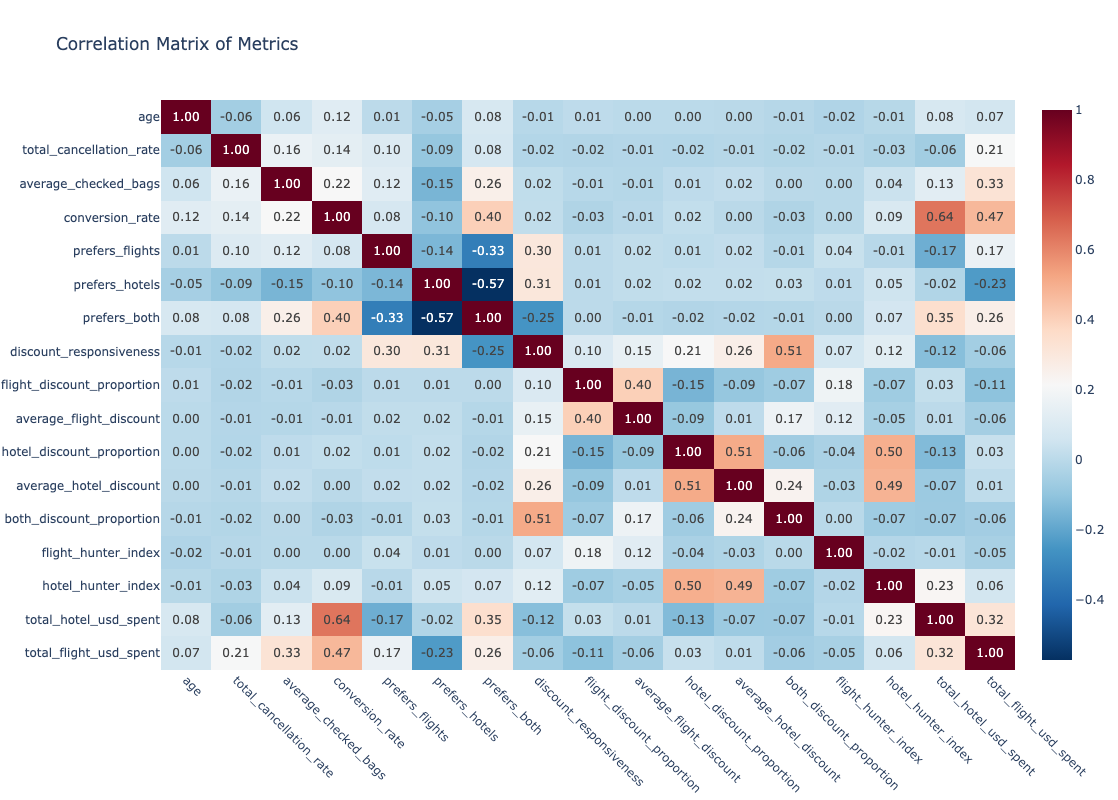

zsh:1: bad pattern: [Correlation
Highly correlated pairs: 
Series([], dtype: float64)

 Now we can remove the highly correlated values, if any.

By removing highly correlated features, we can create a more efficient, interpretable, and reliable model. The goal is to retain only those features that provide unique and valuable information, leading to better performance and easier interpretation of the model.


In [22]:



correlation_matrix = df[[  'age','total_cancellation_rate', 'average_checked_bags', 'conversion_rate',
                     'prefers_flights', 'prefers_hotels', 'prefers_both',  
                     'discount_responsiveness', 'flight_discount_proportion','average_flight_discount',
                     'hotel_discount_proportion', 'average_hotel_discount', 'both_discount_proportion',
                     'flight_hunter_index', 'hotel_hunter_index', 
                     'total_hotel_usd_spent', 'total_flight_usd_spent'
                          ]].corr()

# Generate a heatmap for better visual inspection of the correlation matrix
fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",
    color_continuous_scale='RdBu_r',  # Similar to 'coolwarm'
    title='Correlation Matrix of Metrics',
    aspect='auto',  # Adjust the aspect ratio
)

# Update layout for better appearance
fig.update_layout(
    width=1000,  # Adjust width
    height=800,  # Adjust height
    xaxis=dict(tickangle=45, tickmode='array'),
)
# Save the heatmap to a file for future reference or sharing
file_path = os.path.join(img_dir_path, 'CorrelationVerification.png')

# Create the directory if it does not exist
if not os.path.exists(img_dir_path):
    os.makedirs(img_dir_path)

pio.write_image(fig, file_path, scale=1, width=1654, height=1174)

# Display the heatmap
fig.show()

# Initialize set to hold pairs to be dropped (upper triangle of the matrix)
pairs_to_drop = set()
cols = correlation_matrix.columns
for i in range(0, correlation_matrix.shape[1]):
    for j in range(0, i+1):
        pairs_to_drop.add((cols[i], cols[j]))

# Unstack the correlation matrix and sort by absolute value
corr_abs_unstacked = correlation_matrix.abs().unstack()

# Drop pairs to get unique (i, j) correlations (avoid redundancy)
corr_abs_unstacked = corr_abs_unstacked.drop(labels=pairs_to_drop).sort_values(ascending=False)

# Extract highly correlated pairs (absolute value greater than 0.8)
high_corr = corr_abs_unstacked[corr_abs_unstacked > 0.8]

# for Git Static image
![Correlation Matrix Heatmap](Images/CorrelationVerification.png)

# Display pairs of highly correlated features
print("Highly correlated pairs: ")
print(high_corr)
# Note that features with high correlation may need to be treated carefully during modeling
print("\n Now we can remove the highly correlated values, if any.")
print("\nBy removing highly correlated features, we can create a more efficient, interpretable, and reliable model. The goal is to retain only those features that provide unique and valuable information, leading to better performance and easier interpretation of the model.")

### Cluster Lables
#### Cluster 0: "Free Hotel Meal Seekers"
- Strong Preference for Hotels: prefers_hotels_scaled is high.
- Lower Spending on Flights: Both total_flight_usd_spent_scaled and flight_discount_proportion_scaled are low.
- Discount Responsiveness: discount_responsiveness_scaled is slightly positive.
  Cluster 0 corresponds to "Free Hotel Meal Seekers" due to its strong preference for hotels and relatively low interest in flights.

#### Cluster 1: "Free Checked Bag Seekers"
- Checked Bags: average_checked_bags_scaled is slightly positive.
- Moderate Spending: total_hotel_usd_spent_scaled and total_flight_usd_spent_scaled are slightly positive.
- Hotel Discounts: hotel_discount_proportion_scaled and average_hotel_discount_scaled are high.
 Cluster 1 corresponds to "Free Checked Bag Seekers," as this group shows interest in checked bags and hotel discounts.

#### Cluster 2: "Exclusive Discounts Seekers"
- High Flight Discount Proportion: flight_discount_proportion_scaled is positive.
- Negative Hotel Discount Indicators: hotel_discount_proportion_scaled and average_hotel_discount_scaled are negative.
- Strong Discount Responsiveness: discount_responsiveness_scaled is quite negative, indicating a focus on finding discounts.
 Cluster 2 corresponds to "Exclusive Discounts Seekers," as they seem highly focused on discounts.

#### Cluster 3: "No Cancellation Fee Seekers"
- High Cancellation Rate: total_cancellation_rate_scaled is high.
- Strong Preference for Flights: prefers_flights_scaled is very high.
- Moderate Discount Responsiveness: discount_responsiveness_scaled is positive.
 Cluster 3 corresponds to "No Cancellation Fee Seekers," as they likely want flexibility with their bookings.

#### Cluster 4: "1 Night Free Hotel with Flight Seekers"
- Both Discounts are Significant: both_discount_proportion_scaled is very high.
- Discount Responsiveness: discount_responsiveness_scaled is the highest among all clusters.
- Preference for Combined Offers: Both prefers_both_scaled and average_hotel_discount_scaled are positive.
 Cluster 4 corresponds to "1 Night Free Hotel with Flight Seekers," as they seem to focus on both flight and hotel discounts together.

In [ ]:
# Define the cluster labels
cluster_labels = {
    0: "Free Hotel Meal Seekers",
    1: "Free Checked Bag Seekers",
    2: "Exclusive Discounts Seekers",
    3: "No Cancellation Fee Seekers",
    4: "1 Night Free Hotel with Flight Seekers"
}

# Add the cluster labels to the DataFrame
df['cluster_label'] = df['cluster'].map(cluster_labels)

df.head()

In [ ]:
cluster_counts = df['cluster_label'].value_counts()

print(cluster_counts)